In [1]:
import sklearn
import pandas as pd
df = pd.read_csv("data/heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<Axes: >

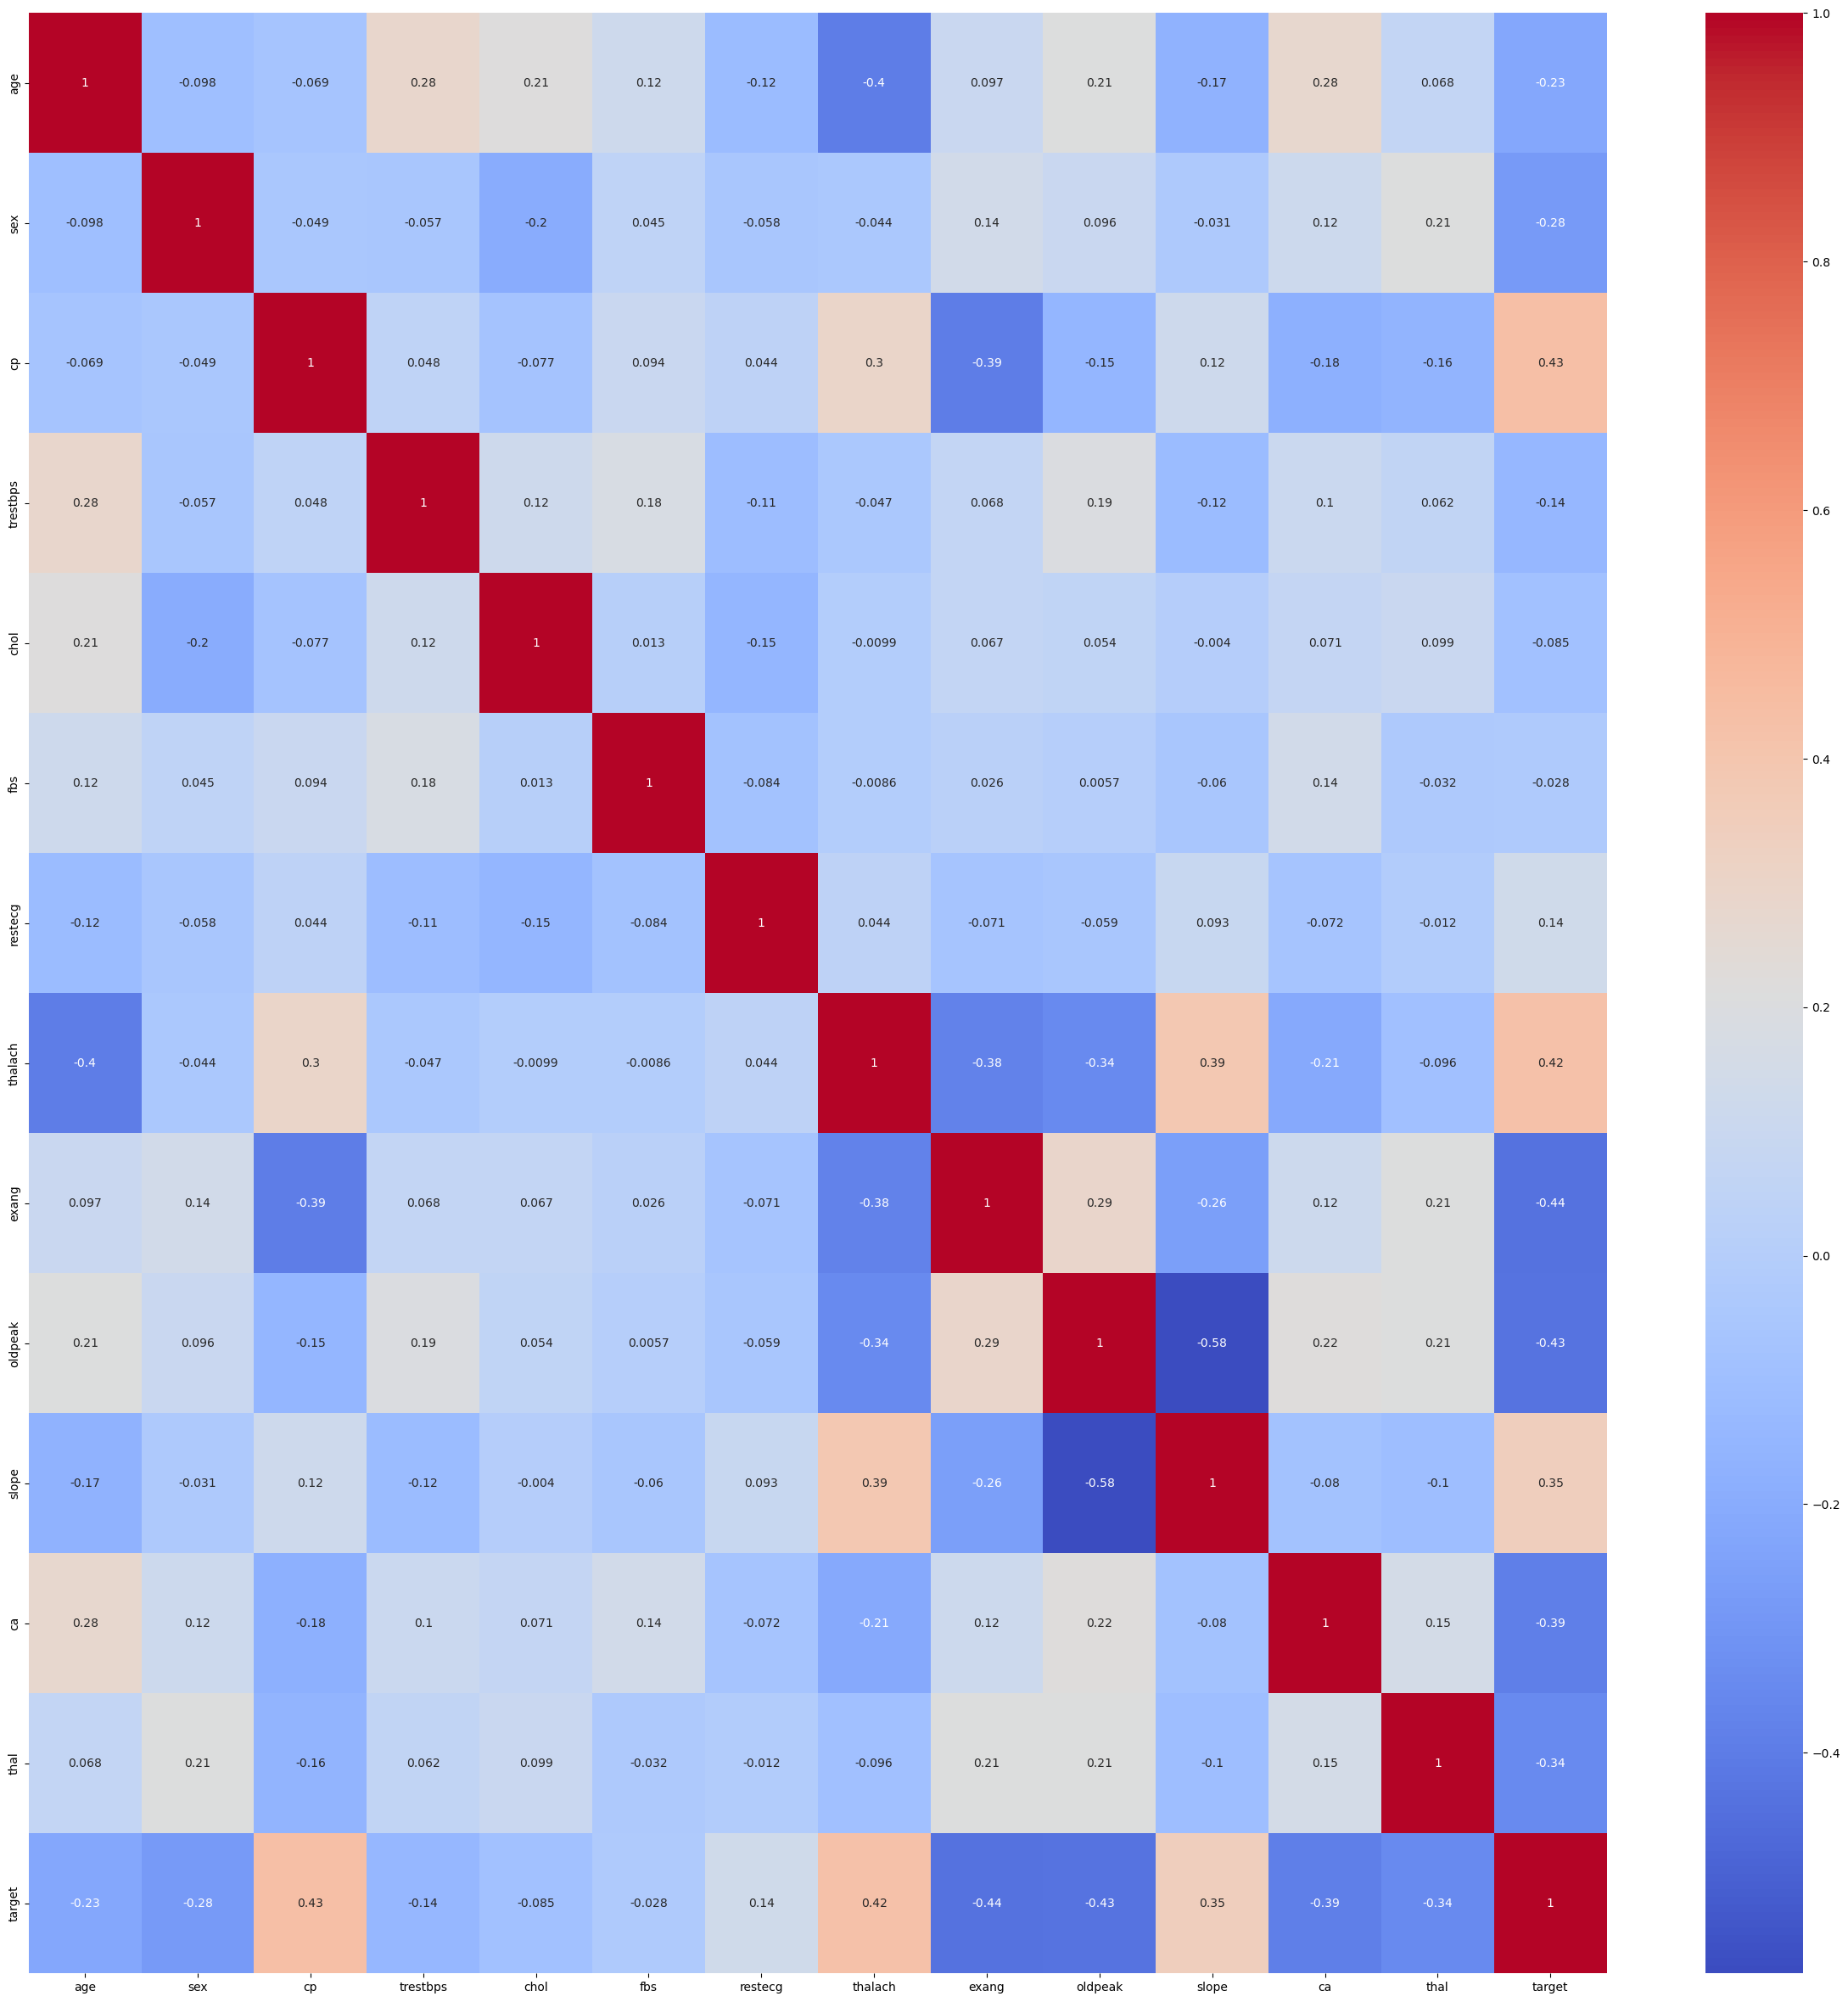

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df.corr()
plt.figure(figsize = (30,30))
sns.heatmap(corr_matrix,annot = True, cmap='coolwarm')

In [5]:
print(corr_matrix["target"].sort_values(ascending=False))

target      1.000000
cp          0.433798
thalach     0.421741
slope       0.345877
restecg     0.137230
fbs        -0.028046
chol       -0.085239
trestbps   -0.144931
age        -0.225439
sex        -0.280937
thal       -0.344029
ca         -0.391724
oldpeak    -0.430696
exang      -0.436757
Name: target, dtype: float64


## Model Training

Logistic Regression:               precision    recall  f1-score   support

           0       0.75      0.79      0.77        42
           1       0.84      0.81      0.83        59

    accuracy                           0.80       101
   macro avg       0.80      0.80      0.80       101
weighted avg       0.80      0.80      0.80       101

RF:               precision    recall  f1-score   support

           0       0.76      0.81      0.78        42
           1       0.86      0.81      0.83        59

    accuracy                           0.81       101
   macro avg       0.81      0.81      0.81       101
weighted avg       0.81      0.81      0.81       101

Logistic Regression:


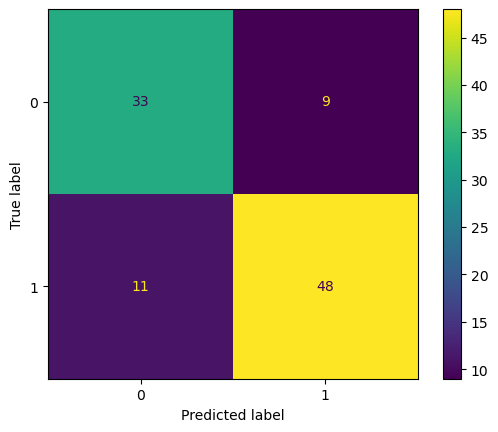

RF


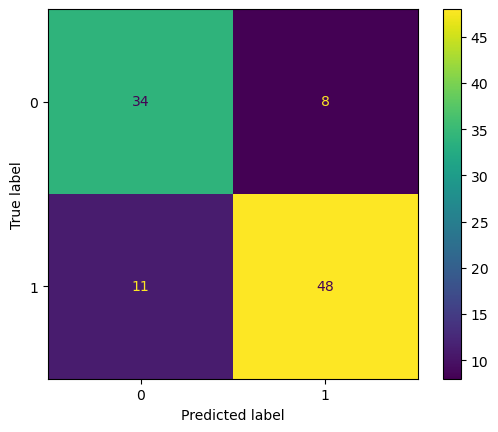

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
  
lr = LogisticRegression().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_rf = rf.predict(X_test)

acc_lr = classification_report(y_test, y_pred_lr)
acc_rf =classification_report(y_test, y_pred_rf)

print('Logistic Regression:',acc_lr)
print('RF:',acc_rf)


from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
print('Logistic Regression:')
disp1 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.show()
print('RF')
disp2 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.show()



## Model Training with PCA

Logistic Regression: 0.8448275862068966
RF: 0.8
Logistic Regression:


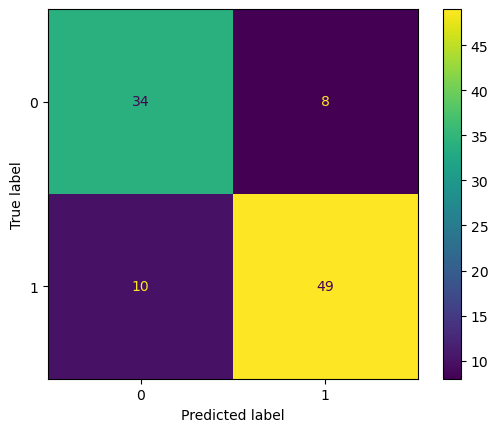

RF


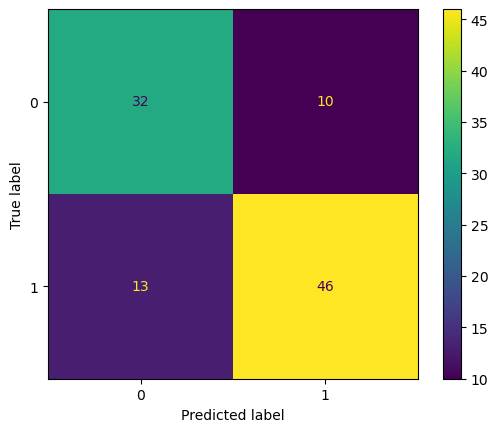

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca.fit(X_scaled)
X_PCA = pca.fit(X_scaled)

X_pca = X_PCA.transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=1/3, random_state=42)

lr_pca = LogisticRegression().fit(X_train, y_train)
rf_pca = RandomForestClassifier().fit(X_train, y_train)

y_pred_lr_pca = lr_pca.predict(X_test)
y_pred_rf_pca = rf_pca.predict(X_test)

acc_lr_pca = f1_score(y_test, y_pred_lr_pca)
acc_rf_pca = f1_score(y_test, y_pred_rf_pca)

print('Logistic Regression:',acc_lr_pca)
print('RF:',acc_rf_pca)

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import ConfusionMatrixDisplay
print('Logistic Regression:')
disp1 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr_pca)
plt.show()
print('RF')
disp2 = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf_pca)
plt.show()

PCA -> worse results, therefore we avoid using PCA

## Model Surface

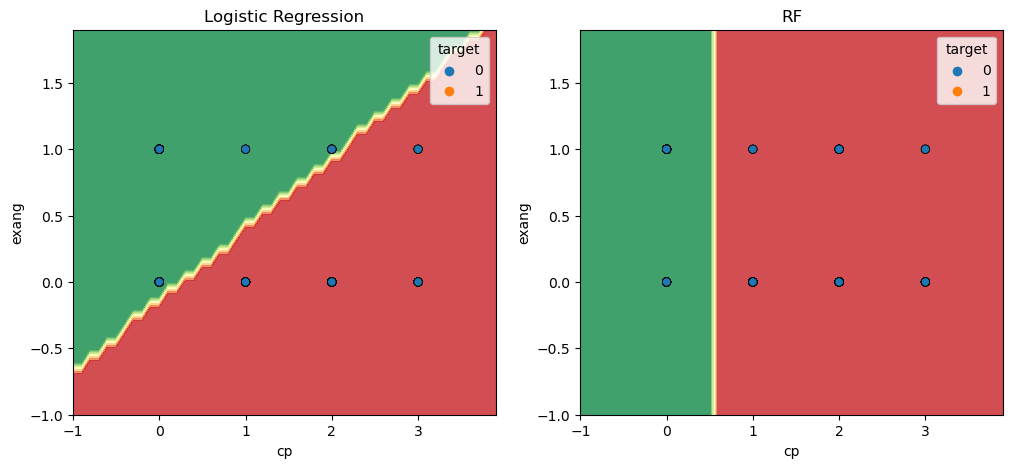

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bounds of the domain
# min1, max1 = X['Glucose'].min() - 1, X['Glucose'].max() + 1
# min2, max2 = X['BMI'].min() - 1, X['BMI'].max() + 1
min1, max1 = X['cp'].min()-1, X['cp'].max()+1
min2, max2 = X['exang'].min()-1, X['exang'].max()+1

x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)

r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))
grid = np.hstack((r1, r2))

# X = df[['Glucose','BMI']]
# y = df['Outcome']

X = df[['cp','exang']]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
  
lr = LogisticRegression().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)

y_pred_lr = lr.predict(grid)
zz_lr = y_pred_lr.reshape(xx.shape)

y_pred_rf = rf.predict(grid)
zz_rf = y_pred_rf.reshape(xx.shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].contourf(xx, yy, zz_lr, cmap='RdYlGn_r', alpha=0.8)
ax[0].set_title('Logistic Regression')

ax[1].contourf(xx, yy, zz_rf, cmap='RdYlGn_r', alpha=0.8)
ax[1].set_title('RF')

for i in range(2):
#     ax[i].set_xlabel('Glucose')
#     ax[i].set_ylabel('BMI')
    ax[i].set_xlabel('cp')
    ax[i].set_ylabel('exang')
#     sns.scatterplot(x='Glucose', y='BMI', hue='Outcome', data=df, edgecolor='k', ax=ax[i])
    sns.scatterplot(x='cp', y='exang', hue='target', data=df, edgecolor='k', ax=ax[i])

plt.show()

## RF Hyperparameter tuning

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm

# Your data (X, y) should be defined here

# Define the RandomForestClassifier
clf = RandomForestClassifier()

# Define the hyperparameter grid
params_grid = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20, 25],
    'min_samples_leaf': [5, 10, 20],
    'min_weight_fraction_leaf': [0.0, 0.25, 0.5],
    'max_features': ['sqrt', 'log2'],
    'max_leaf_nodes': [1, 5, 10, 20, 30],
    'min_impurity_decrease': [0.0, 0.01, 0.05],
}

# Initialize GridSearchCV with the classifier, parameter grid, and cross-validation folds
gscv = GridSearchCV(clf, params_grid, cv=5, return_train_score=True)

# Define the total number of iterations (combinations of hyperparameters)
total_iterations = len(list(gscv.get_params()['param_grid'].values())[0])

# Fit the grid search object to the data with tqdm to show the loading bar
with tqdm(total=total_iterations, desc="Grid Search Progress") as pbar:
    gscv.fit(X, y)
    pbar.update(1)

# Print the best parameters
print("Best Parameters:", gscv.best_params_)

Grid Search Progress:  20%|███████████▌                                              | 1/5 [53:42<3:34:51, 3222.85s/it]

Best Parameters: {'max_depth': 3, 'max_features': 'sqrt', 'max_leaf_nodes': 5, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0}


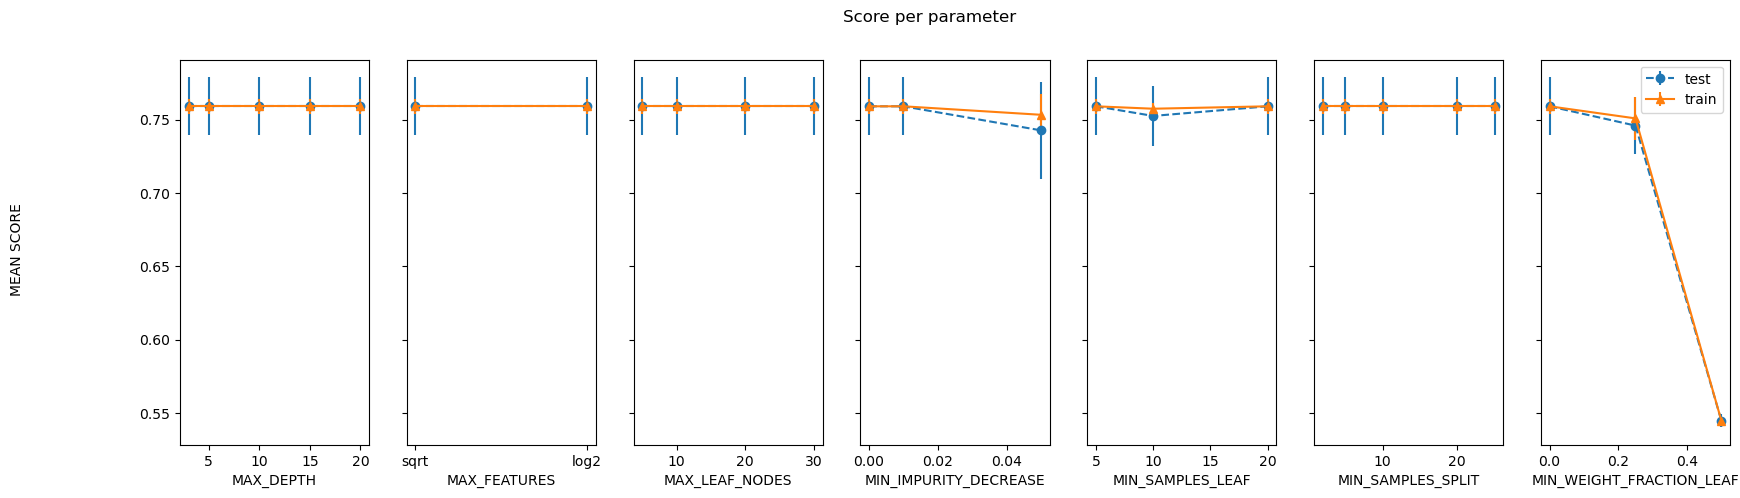

In [12]:
def plot_search_results(grid):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks = []
    masks_names = list(grid.best_params_.keys())
    
    for p_k, p_v in grid.best_params_.items():
        if p_v == None:
            p_v = 'None'# Check if the parameter value is None
            masks.append(list(results['param_'+p_k].data == p_v))
        else:
            masks.append(list(results['param_'+p_k].data == p_v))

    params = grid.param_grid
    
    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle('Score per parameter')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

plot_search_results(gscv)

## Model Training with Tuning

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)
parm = gscv.best_params_

rf = RandomForestClassifier(max_depth= parm['max_depth'],
                            min_samples_split= parm['min_samples_split'],
                            min_samples_leaf=parm['min_samples_leaf'],
                            min_weight_fraction_leaf= parm['min_weight_fraction_leaf'],
                            max_features= parm['max_features'],
                            max_leaf_nodes= parm['max_leaf_nodes'],
                            min_impurity_decrease= parm['min_impurity_decrease'])
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


acc_rf_2 = classification_report(y_test, y_pred_rf)

print('RF without hyperparameter tuning:',acc_rf)
print('RF with hyperparameter tuning:',acc_rf_2)

RF without hyperparameter tuning:               precision    recall  f1-score   support

           0       0.76      0.81      0.78        42
           1       0.86      0.81      0.83        59

    accuracy                           0.81       101
   macro avg       0.81      0.81      0.81       101
weighted avg       0.81      0.81      0.81       101

RF with hyperparameter tuning:               precision    recall  f1-score   support

           0       0.82      0.79      0.80        42
           1       0.85      0.88      0.87        59

    accuracy                           0.84       101
   macro avg       0.84      0.83      0.84       101
weighted avg       0.84      0.84      0.84       101



As seen, RF with hyperparameter tuning overall, is much better. If we compare RF and Decision Trees, we can clearly see that RF (0.84%) is more accurate than Decision Trees (0.81%).